In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error,classification_report
from sklearn.metrics import precision_recall_fscore_support as score

In [6]:
dataframe=pd.read_csv("/content/HR_comma_sep.csv")
dataframe.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
'''Checking is any null value exists'''

dataframe.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

			Checking for outliers



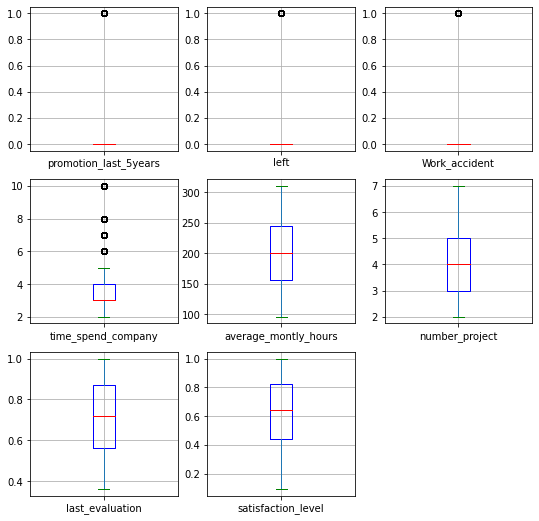

In [15]:
print("\t\t\tChecking for outliers\n")
plt.figure(figsize=(9, 9)) 
plt.subplot(3, 3, 1)
dataframe.boxplot(column=['promotion_last_5years'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 2, )
dataframe.boxplot(column=['left'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 3, )
dataframe.boxplot(column=['Work_accident'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 4, )
dataframe.boxplot(column=['time_spend_company'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 5, )
dataframe.boxplot(column=['average_montly_hours'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 6)
dataframe.boxplot(column=['number_project'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 7, )
dataframe.boxplot(column=['last_evaluation'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 8, )
dataframe.boxplot(column=['satisfaction_level'], color=dict(boxes='b', medians='r', caps='g'))
plt.show()

In [17]:
dataframe = dataframe.replace({'salary': {'low': 1, 'medium': 2, 'high': 3}})
dataframe = pd.get_dummies(dataframe,columns = ['Department'])

# KNN

Class defining

In [19]:
df_knn = dataframe.copy()
x = df_knn.iloc[:, :-1].values
y = df_knn.iloc[:, -1].values

In [22]:
#standardizing dataset
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [32]:
print('Test Accuracy Score:', accuracy_score(y_test, y_pred)*100, '%\n')

print('----------------------Classification Report----------------------\n', classification_report(y_test, y_pred))
print('----------------------Confusion Matrix----------------------\n', confusion_matrix(y_test, y_pred))

Test Accuracy Score: 99.97777777777777 %

----------------------Classification Report----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3660
           1       1.00      1.00      1.00       840

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

----------------------Confusion Matrix----------------------
 [[3660    0]
 [   1  839]]


# KNN 
Clustering

In [33]:
df_clust = dataframe.copy()
df_clust = df_clust.drop(columns=['left']) 

In [34]:
scaler = StandardScaler()
data = scaler.fit_transform(df_clust)
df_clust = pd.DataFrame(data, columns=df_clust.columns)

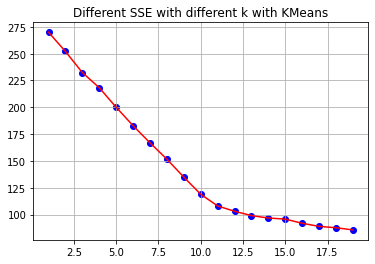

(Text(0.5, 1.0, 'Different SSE with different k with KMeans'), None, None)

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
for i in range(1, 20):
    model = KMeans(n_clusters=i, random_state=48)
    model.fit(df_clust)
    sse.append(model.inertia_ / 1000)
plt.plot(range(1, 20), sse, color='r')
plt.scatter(range(1, 20), sse, color='b')
plt.title('Different SSE with different k with KMeans'), plt.grid(), plt.show()

In [41]:
model = KMeans(n_clusters=3, random_state=48)
cluster_labels = model.fit_predict(df_clust)
score = silhouette_score(df_clust, cluster_labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.091


In [42]:
predict = model.predict(df_clust)

# adding our predictions to our dataset 
df_clust['new_left'] = pd.Series(predict, index=df_clust.index)
df_clust

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,new_left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,2
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,2
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,2
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,2
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1



Value counts with respect to 'Left' column in dataset class
 0    11428
1     3571
Name: left, dtype: int64 


 Value counts with respect to 'Left' column in dataset cluster
 1    8139
2    4140
0    2720
Name: new_left, dtype: int64 



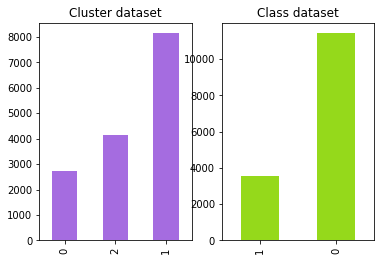

In [54]:
plt.subplot(1, 2, 1)
df_clust['new_left'].value_counts().sort_values().plot(kind = 'bar',color = '#A56CE0',title='Cluster dataset')


plt.subplot(1, 2, 2)
df_knn['left'].value_counts().sort_values().plot(kind = 'bar' ,color = '#95D91B',title="Class dataset")


print("\nValue counts with respect to 'Left' column in dataset class\n",df_knn['left'].value_counts(),"\n")

print("\n Value counts with respect to 'Left' column in dataset cluster\n",df_clust['new_left'].value_counts(),"\n")

plt.show()

In [57]:
#Seeing what the dataset with new field effects prediction

x_clus = df_clust.iloc[:, :-1].values
y_clus = df_clust.iloc[:,-1].values

scaler = StandardScaler()
x_clus = scaler.fit_transform(x_clus)


x_train, x_test, y_train, y_test = train_test_split(x_clus, y_clus, test_size=0.3, random_state=42)

# ========================= KNeighborsClassifier  ================================
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
# cluster_eval = compute(y_test, knn.predict(x_test))
print("Accuracy of our new model is ",accuracy_score(y_test,y_pred))

Accuracy of our new model is  1.0
